In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Route and airline analysis by calculating average departure delays and counting cancellations

In [47]:
flights_weather = pd.read_csv('flights_weather2022.csv')
flights = pd.read_csv('flights2022.csv')

In [48]:
flights_weather['route'] = flights_weather['origin'] + '-' + flights_weather['dest']

In [49]:
route_delays = flights_weather.groupby('route')['dep_delay'].mean().reset_index()

In [50]:
route_cancels = flights_weather['route'][flights_weather['dep_delay'].isna()].value_counts().reset_index()
route_cancels.columns = ['route', 'num_cancels']

In [51]:
routes_delays_cancels = pd.merge(route_delays, route_cancels, on='route', how='outer').fillna(0)

In [52]:
airline_delays = flights_weather.groupby('airline')['dep_delay'].mean().reset_index()

In [53]:
airline_cancels = flights_weather['airline'][flights_weather['dep_delay'].isna()].value_counts().reset_index()
airline_cancels.columns = ['airline', 'num_cancels']

In [54]:
airlines_delays_cancels = pd.merge(airline_delays, airline_cancels, on='airline', how='outer').fillna(0)

## Bar chart for Top 9 routes with the highest number of cancellations

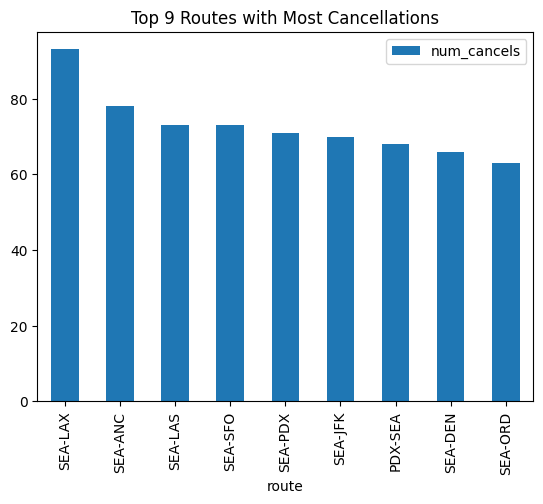

In [55]:
top9_route_cancels = routes_delays_cancels.nlargest(9, 'num_cancels')
top9_route_cancels.plot(kind='bar', x='route', y='num_cancels', title='Top 9 Routes with Most Cancellations')
plt.show()

## Bar chart for Top 9 airlines with the highest average departure delays

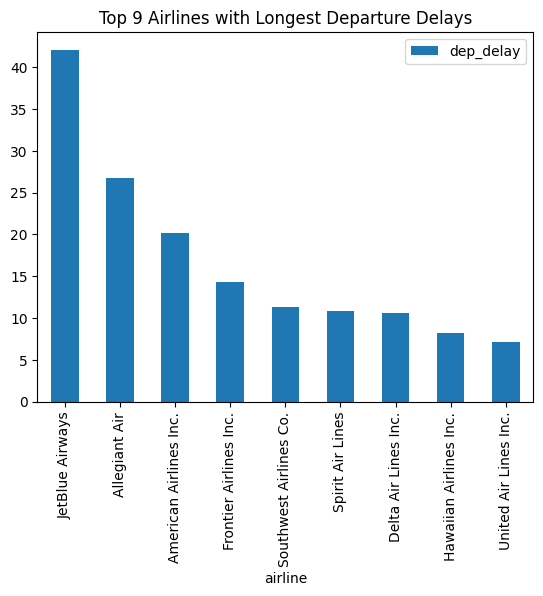

In [56]:
top9_airline_delays = airlines_delays_cancels.nlargest(9, 'dep_delay')
top9_airline_delays.plot(kind='bar', x='airline', y='dep_delay', title='Top 9 Airlines with Longest Departure Delays')
plt.show()

## Impact of wind gusts on departure delays for SEA and PDX

In [57]:
sea_pdx = flights_weather[flights_weather['origin'].isin(['SEA', 'PDX'])]
windy_delays = sea_pdx.groupby('origin').apply(
    lambda x: x[x['wind_gust'] >= 10]['dep_delay'].mean() > x[x['wind_gust'] < 10]['dep_delay'].mean()
)
wind_response = windy_delays.all()

## Outcome

In [58]:
print("Routes Delays and Cancellations:")
print(routes_delays_cancels)

Routes Delays and Cancellations:
       route  dep_delay  num_cancels
0    PDX-ABQ   1.165563          2.0
1    PDX-ANC   4.844828          3.0
2    PDX-ATL   7.106195         13.0
3    PDX-AUS   5.513699          5.0
4    PDX-BOI   5.191801          7.0
..       ...        ...          ...
144  SEA-STS   6.782493          5.0
145  SEA-SUN   5.735537          5.0
146  SEA-TPA   6.537344         20.0
147  SEA-TUS   6.178707         13.0
148  SEA-YKM   5.427350         11.0

[149 rows x 3 columns]


In [59]:
print("\nAirlines Delays and Cancellations:")
print(airlines_delays_cancels)


Airlines Delays and Cancellations:
                   airline  dep_delay  num_cancels
0     Alaska Airlines Inc.   6.749944         1298
1            Allegiant Air  26.769231            6
2   American Airlines Inc.  20.181184           85
3     Delta Air Lines Inc.  10.635924          382
4   Frontier Airlines Inc.  14.253394           12
5   Hawaiian Airlines Inc.   8.241331            4
6              Horizon Air   6.284673          238
7          JetBlue Airways  42.110937           32
8    SkyWest Airlines Inc.   4.610992          165
9   Southwest Airlines Co.  11.341302          100
10        Spirit Air Lines  10.841270           38
11   United Air Lines Inc.   7.087027           80


In [60]:
print(f"\nDoes 10+ mph wind gusts have a larger average departure delay for SEA and PDX? {wind_response}")


Does 10+ mph wind gusts have a larger average departure delay for SEA and PDX? True
